<h1>Supervised Learning</h1>

In [511]:
import pandas as pd
from sklearn.model_selection import train_test_split

In [512]:
#Load the data selected
df = pd.read_csv("../data/heart_disease_selected.csv") 
df.head()
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 920 entries, 0 to 919
Data columns (total 8 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   chol      920 non-null    float64
 1   thalach   920 non-null    float64
 2   age       920 non-null    float64
 3   cp_4.0    920 non-null    int64  
 4   oldpeak   920 non-null    float64
 5   exang     920 non-null    float64
 6   trestbps  920 non-null    float64
 7   target    920 non-null    int64  
dtypes: float64(6), int64(2)
memory usage: 57.6 KB


In [513]:
df.rename(columns= lambda x: x.strip(), inplace=True)
df.columns

Index(['chol', 'thalach', 'age', 'cp_4.0', 'oldpeak', 'exang', 'trestbps',
       'target'],
      dtype='object')

In [514]:
# split the data into X and y
X = df.drop("target", axis=1)
y = df["target"]

In [515]:
# split train and test set (20% test size, 80% train size)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2,stratify=y, random_state=42)
X_train.shape, X_test.shape, y_train.shape, y_test.shape


((736, 7), (184, 7), (736,), (184,))

<h2>Train The Models</h2>

In [516]:
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC


In [517]:
# define models 
models = {
    "Logistic Regression": LogisticRegression(max_iter=1000 ,solver='liblinear' , random_state=42),
    "Random Forest": RandomForestClassifier(n_estimators=200, max_depth=1, random_state=42),
    "Decision Tree": DecisionTreeClassifier(min_samples_split=5,max_depth=1, random_state=42),
    "Support Vector Machine": SVC(random_state=42 , probability=True , kernel='linear' , C=1.0, gamma='auto')    
}

In [518]:
for name, model in models.items():
    model.fit(X_train, y_train)
    print(f"{name} has been trained")

Logistic Regression has been trained
Random Forest has been trained
Decision Tree has been trained
Support Vector Machine has been trained


<h2>Evaluate the Models</h2>

In [519]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, roc_curve 
import matplotlib.pyplot as plt

In [520]:
Results = []

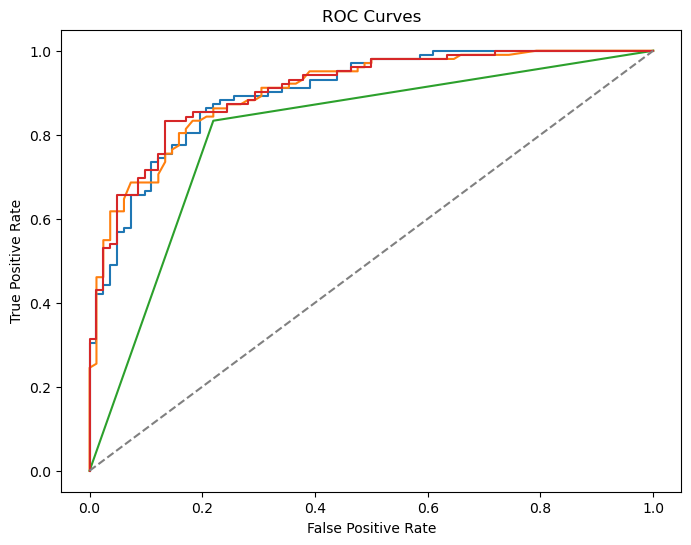

In [521]:
plt.figure(figsize=(8, 6))
for name, model in models.items():
    y_pred = model.predict(X_test)
    y_proba = model.predict_proba(X_test)[:, 1]

    # Calculate metrics
    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred)
    recall = recall_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred)
    roc_auc = roc_auc_score(y_test, y_proba)
    
    Results.append({
        "Model": name,
        "Accuracy": accuracy,
        "Precision": precision,
        "Recall": recall,
        "F1 Score": f1,
        "ROC AUC": roc_auc
    })
    # ROC Curve
    fpr, tpr, _ = roc_curve(y_test, y_proba)
    plt.plot(fpr, tpr, label=f'{name} (AUC = {roc_auc:.2f})')
    
# plot ROC curve
plt.plot([0,1],[0,1],"--",color="gray")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curves")
plt.show()

In [522]:
# show performance metrics
results_df = pd.DataFrame(Results)
results_df = results_df.sort_values(by="ROC AUC", ascending=False).reset_index(drop=True)
results_df

,Model,Accuracy,Precision,Recall,F1 Score,ROC AUC
0,Support Vector Machine,0.809783,0.813084,0.852941,0.832536,0.907221
1,Random Forest,0.815217,0.809091,0.872549,0.839623,0.903635
2,Logistic Regression,0.831522,0.831776,0.872549,0.851675,0.900287
3,Decision Tree,0.809783,0.825243,0.833333,0.829268,0.806911
